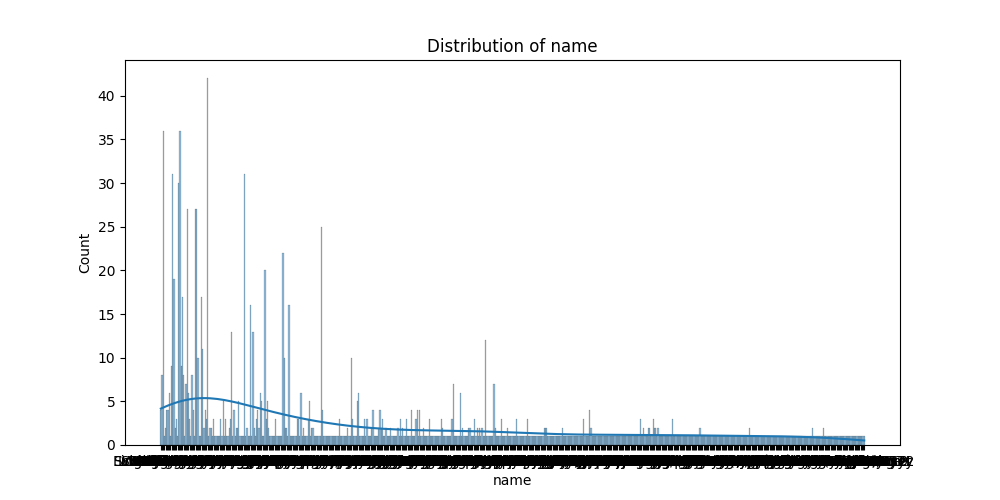

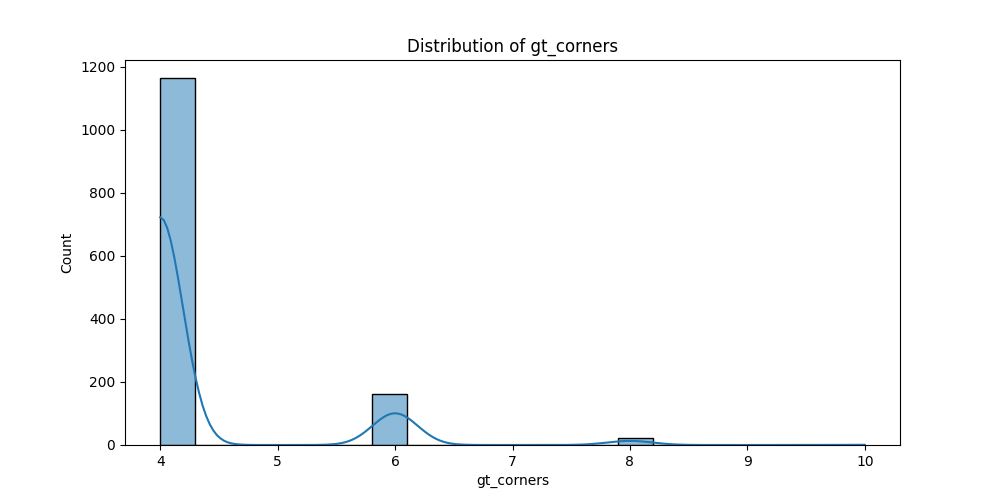

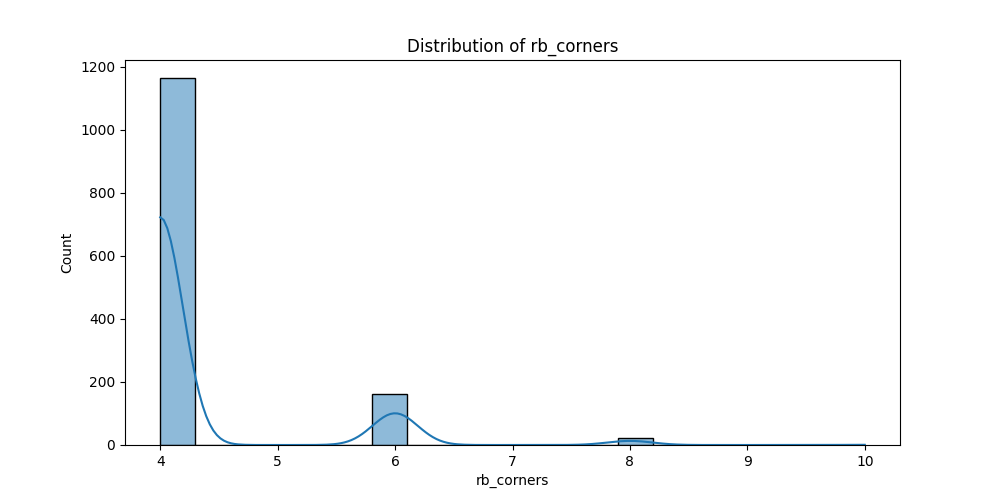

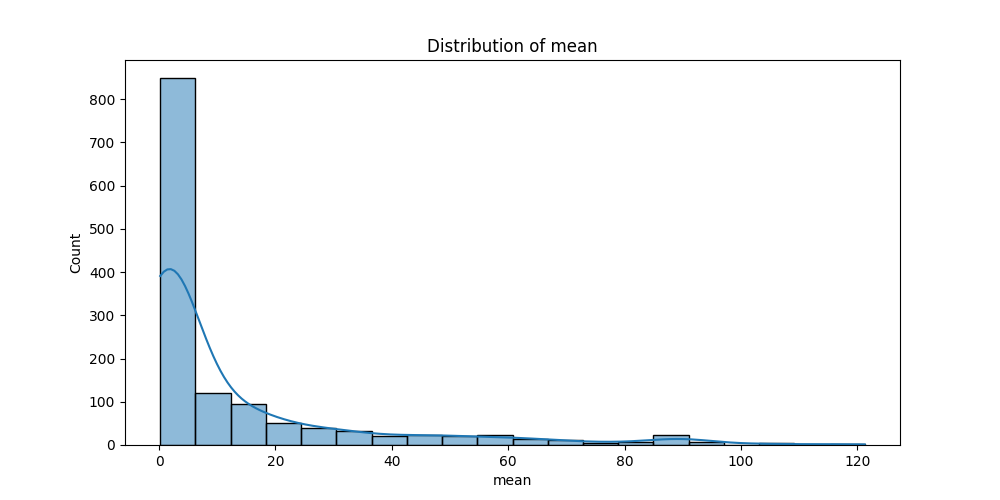

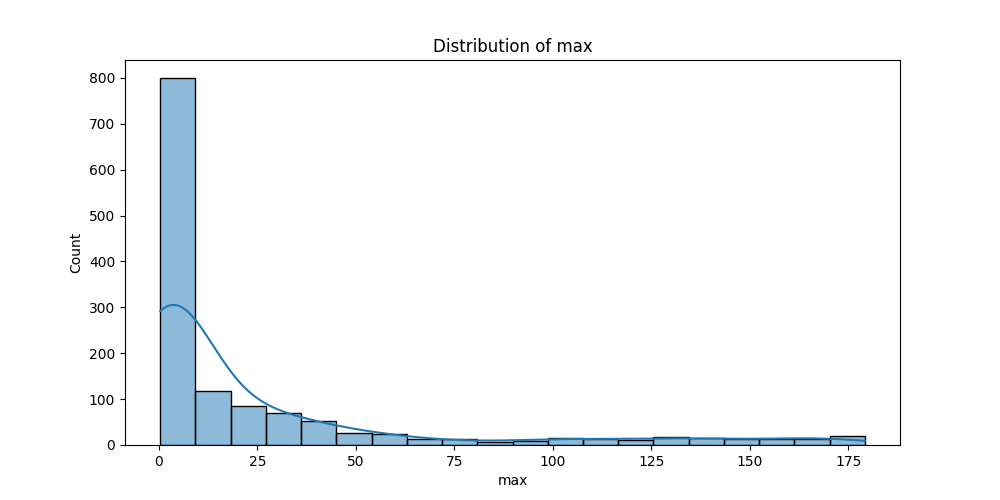

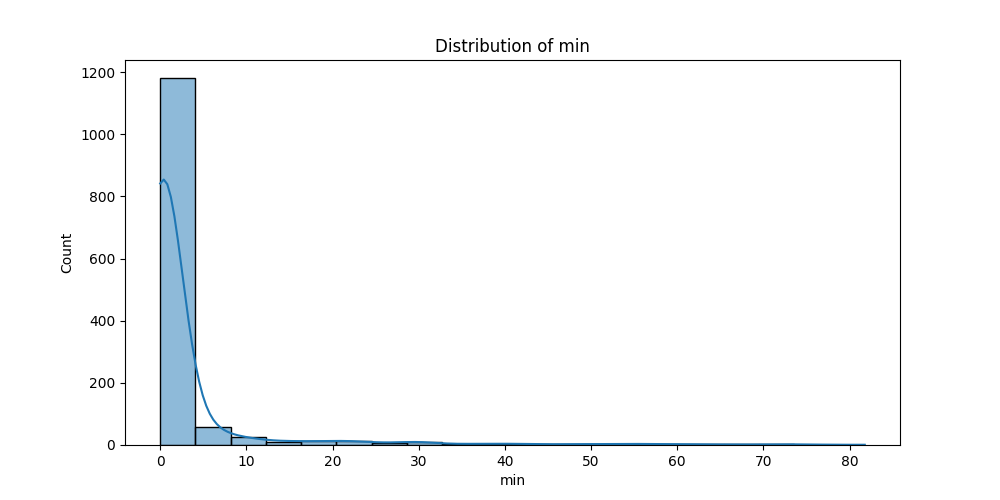

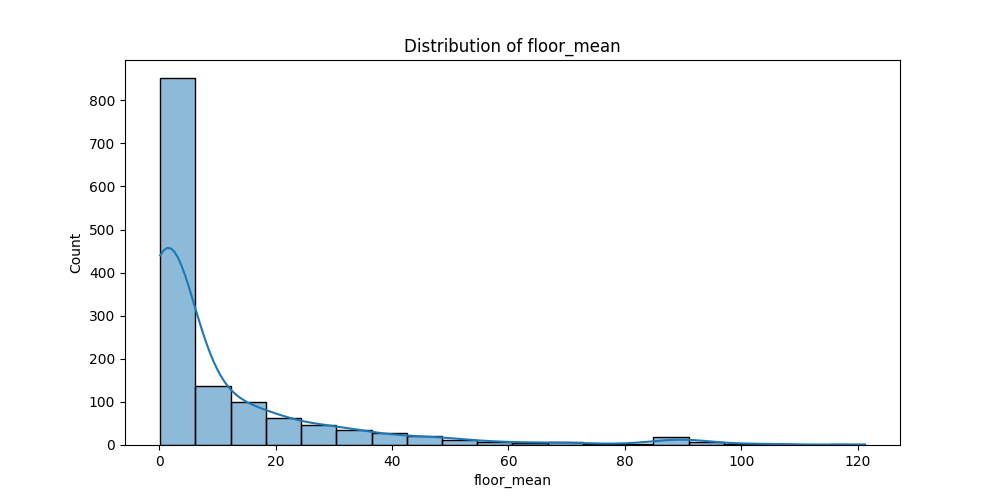

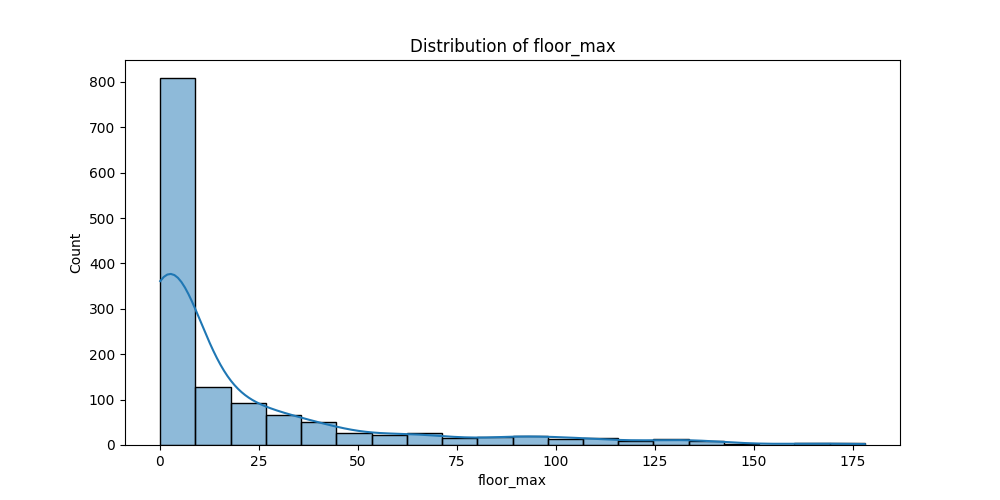

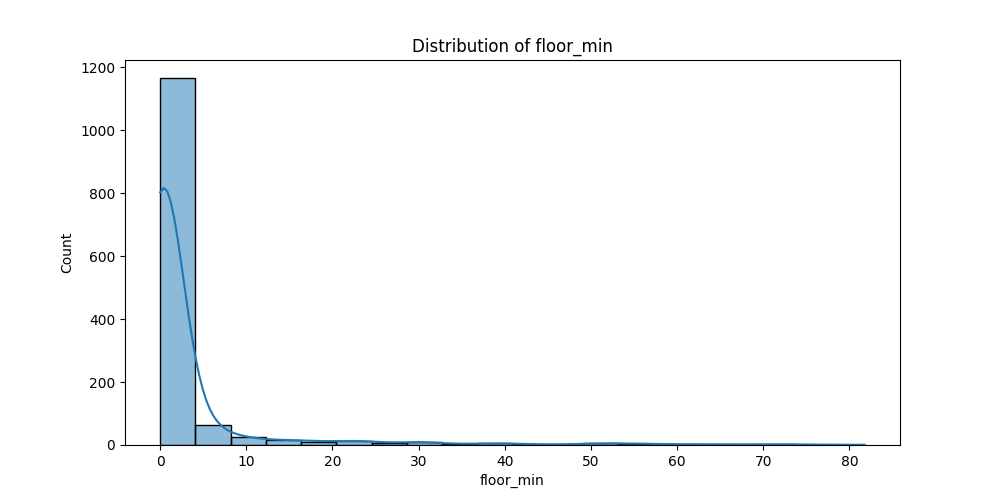

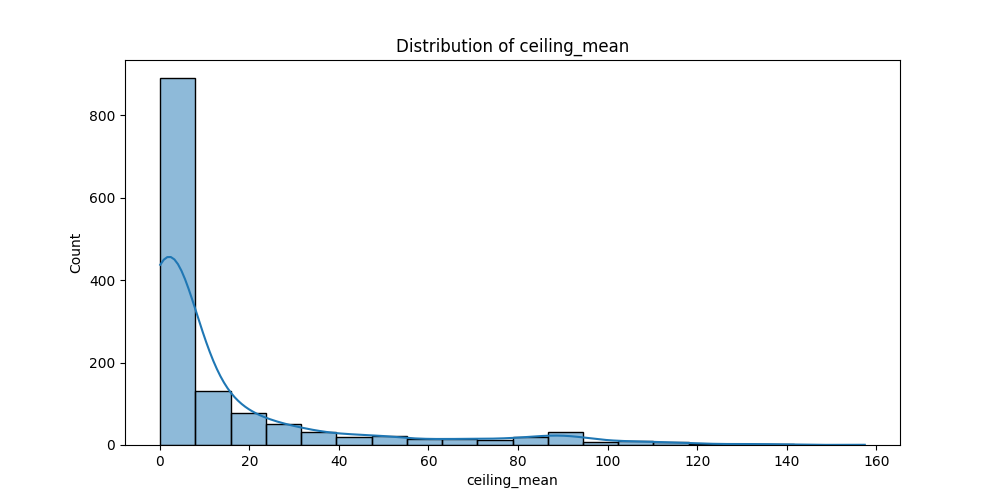

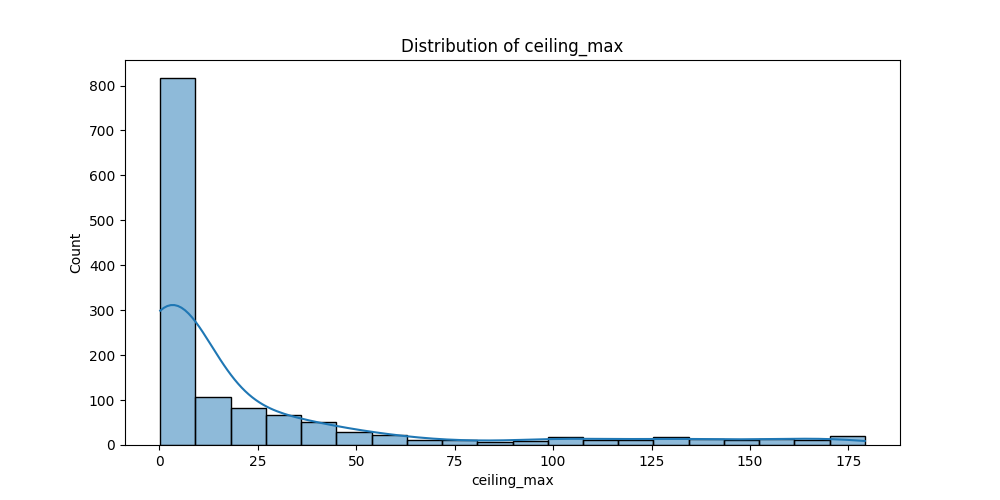

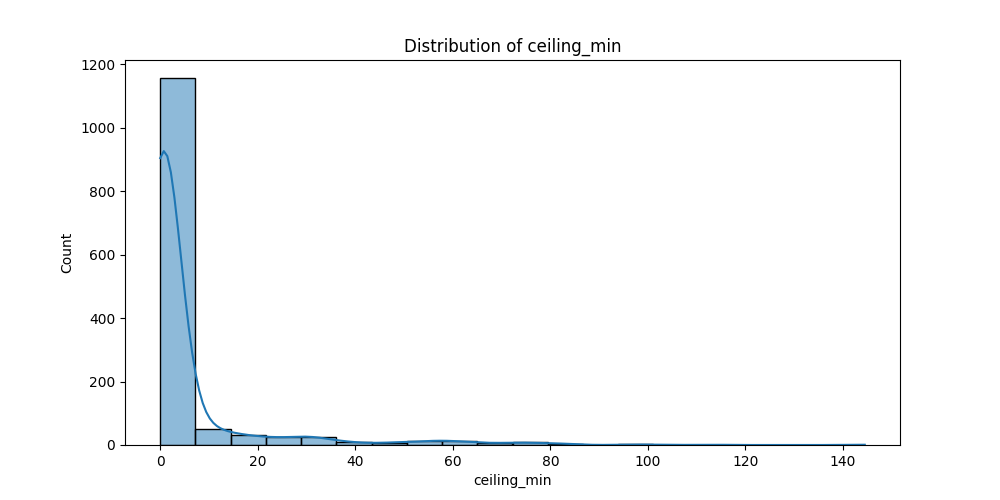

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Image 

class Plotter:
    def __init__(self, data, folder_path): 
        self.data = data
        self.folder_path = folder_path

    def draw_plots(self):
        if not os.path.exists(self.folder_path):
            os.makedirs(self.folder_path)

        plot_paths = []
        for col in self.data.columns:
            plt.figure(figsize=(10, 5))
            sns.histplot(data=self.data, x=col, kde=True, bins=20)
            plt.title(f'Distribution of {col}')
            plot_path = f'{self.folder_path}/{col}.png'
            plt.savefig(plot_path)
            plt.close()
            plot_paths.append(plot_path)
        return plot_paths

def draw_plots(file_path, folder_path):
    data = pd.read_json(file_path)
    plotter = Plotter(data, folder_path) 
    plot_paths = plotter.draw_plots()
    return plot_paths 

file_path = 'deviation.json'

folder_path = 'charts'

plot_paths = draw_plots(file_path, folder_path)

for path in plot_paths:
    display(Image(filename=path))